
INFO6105 Instructor: Dr. Handan Liu

# Homework 3


## Dhruvil Shah

# Part-1: Working with Text Data and Naive Bayes in Scikit-Learn

In [3]:
from sklearn.feature_extraction.text import CountVectorizer


In [4]:
#1 : Give a simple dataset
simple_train = ['call you tonight', 'Call me a cab', 'please call me... PLEASE!']

In [5]:
#2 : Learn the 'vocabulary' of the training data
vector = CountVectorizer()
vector.fit(simple_train)
vector.get_feature_names()

['cab', 'call', 'me', 'please', 'tonight', 'you']

In [6]:
#3 : Transform training data into a 'document-term matrix'
training_dtm = vector.transform(simple_train)
training_dtm

<3x6 sparse matrix of type '<class 'numpy.int64'>'
	with 9 stored elements in Compressed Sparse Row format>

In [8]:
#4 : Print the sparse matrix

print(training_dtm)

  (0, 1)	1
  (0, 4)	1
  (0, 5)	1
  (1, 0)	1
  (1, 1)	1
  (1, 2)	1
  (2, 1)	1
  (2, 2)	1
  (2, 3)	2


In [9]:
#5 : convert the sparse matrix to a dense matrix use “toarray()”

training_dtm.toarray()

array([[0, 1, 0, 0, 1, 1],
       [1, 1, 1, 0, 0, 0],
       [0, 1, 1, 2, 0, 0]], dtype=int64)

In [10]:
#6 : examine the vocabulary and document-term matrix together use pandas DataFrame and columns by using “get_feature_names()”

import pandas as pd
pd.DataFrame(training_dtm.toarray(), columns=vector.get_feature_names())

,cab,call,me,please,tonight,you
0,0,1,0,0,1,1
1,1,1,1,0,0,0
2,0,1,1,2,0,0


In [11]:
#7 : transform testing data into a document-term matrix (using existing vocabulary)

simple_test = ["please don't call me"]
testing_dtm = vector.transform(simple_test)
testing_dtm.toarray()

array([[0, 1, 1, 1, 0, 0]], dtype=int64)

In [12]:
#8 : examine the vocabulary and document-term matrix together

pd.DataFrame(testing_dtm.toarray(), columns=vector.get_feature_names())

,cab,call,me,please,tonight,you
0,0,1,1,1,0,0


## Reading SMS Data from TSV File

In [13]:
#9 : read tab-separated file “sms.tsv”

In [14]:
url = 'sms.tsv'
col_names = ['label', 'message']
sms = pd.read_csv(url, sep='\t', header=None, names=col_names)
print(sms.shape)

(5572, 2)


In [15]:
sms.head(20)

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
5,spam,FreeMsg Hey there darling it's been 3 week's n...
6,ham,Even my brother is not like to speak with me. ...
7,ham,As per your request 'Melle Melle (Oru Minnamin...
8,spam,WINNER!! As a valued network customer you have...
9,spam,Had your mobile 11 months or more? U R entitle...


In [16]:
sms.label.value_counts()

ham     4825
spam     747
Name: label, dtype: int64

In [17]:
#10 : convert label to a numeric variable

sms['label'] = sms.label.map({'ham':0, 'spam':1})

In [18]:
#11 : define X and y

X = sms.message
y = sms.label

In [19]:
#12 : split into training and testing sets by train_test_split(); and print the shape of training set and test set.

import numpy as np
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)
print(X_train.shape)
print(X_test.shape)

(4179,)
(1393,)


In [20]:
# Vectorizing SMS data

In [21]:
#13 : instantiate the vectorizer by CountVectorizer()

vect = CountVectorizer()

In [22]:
#14 : learn training data vocabulary, then create document-term matrix “X_train_dtm”

vect.fit(X_train)
X_train_dtm = vect.transform(X_train)
X_train_dtm

<4179x7456 sparse matrix of type '<class 'numpy.int64'>'
	with 55209 stored elements in Compressed Sparse Row format>

In [23]:
#15 : transform testing data (using fitted vocabulary) into a document-term matrix

X_test_dtm = vect.transform(X_test)
X_test_dtm

<1393x7456 sparse matrix of type '<class 'numpy.int64'>'
	with 17604 stored elements in Compressed Sparse Row format>

## Building a Naive Bayes model by using Multinomial Naïve Bayes

In [24]:
#16 : train a Naive Bayes model using the matrix “X_train_dtm”

from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB()
nb.fit(X_train_dtm, y_train)

MultinomialNB()

In [25]:
#17 : calculate accuracy of predictions

from sklearn import metrics
print(metrics.accuracy_score(y_test, nb.predict(X_test_dtm)))

0.9885139985642498


In [26]:
#18 : give the confusion matrix

print(metrics.confusion_matrix(y_test, nb.predict(X_test_dtm)))

[[1203    5]
 [  11  174]]


In [27]:
#19 : print message text for the false positives

X_test[y_test < nb.predict(X_test_dtm)]

574               Waiting for your call.
3375             Also andros ice etc etc
45      No calls..messages..missed calls
3415             No pic. Please re-send.
1988    No calls..messages..missed calls
Name: message, dtype: object

In [28]:
#20 : print message text for the false negatives

X_test[y_test > nb.predict(X_test_dtm)]

3132    LookAtMe!: Thanks for your purchase of a video...
5       FreeMsg Hey there darling it's been 3 week's n...
3530    Xmas & New Years Eve tickets are now on sale f...
684     Hi I'm sue. I am 20 years old and work as a la...
1875    Would you like to see my XXX pics they are so ...
1893    CALL 09090900040 & LISTEN TO EXTREME DIRTY LIV...
4298    thesmszone.com lets you send free anonymous an...
4949    Hi this is Amy, we will be sending you a free ...
2821    INTERFLORA - It's not too late to order Inter...
2247    Hi ya babe x u 4goten bout me?' scammers getti...
4514    Money i have won wining number 946 wot do i do...
Name: message, dtype: object

# Part-2 Linear Regression

In [29]:
import numpy as np
import matplotlib.pyplot as plt 

import pandas as pd  
import seaborn as sns 

%matplotlib inline

In [30]:
from sklearn.datasets import load_boston

boston_dataset = load_boston()

# boston_dataset is a dictionary
boston_dataset.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

In [31]:
boston = pd.DataFrame(boston_dataset.data, columns=boston_dataset.feature_names)
boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [32]:
boston['MEDV'] = boston_dataset.target

In [33]:
# To check missing values in all columns
boston.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

In [34]:
boston.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [35]:
del boston['MEDV']

In [36]:
corr = boston.corr()
corr

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993


In [37]:
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

In [38]:
import seaborn as sns 
cmap = sns.color_palette("Paired")

<AxesSubplot:>

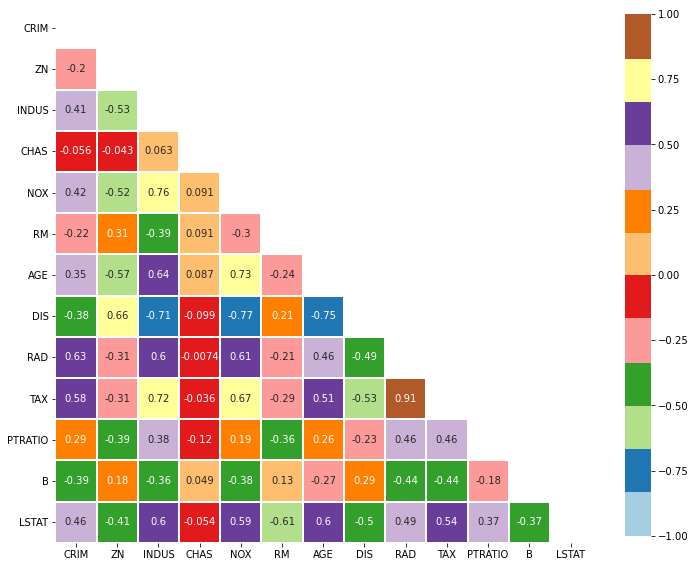

In [39]:
fig, ax = plt.subplots(figsize=(12,12))
sns.heatmap(corr, mask=mask,  cmap=cmap, vmin=-1, vmax=1, center=0,
           square=True, linewidths=1, cbar_kws={"shrink": 0.8},annot=True)

4)In the above plot, what features are highly correlated? Which features are highly uncorrelated?

RAD and TAX are highly positively correlated (0.91) features

NOX and DIS are highly uncorrelated (-0.77) features

5)Building the Linear Regression Model

In [40]:
boston['Price'] = boston_dataset.target
X = boston.drop('Price', axis = 1)
Y = boston['Price']

In [41]:
# Split the data into training and testing sets

from sklearn.model_selection import train_test_split

# splits the training and test data set in 70% : 30%
# assigning random_state to any value to ensures consistency.
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state=10)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(354, 13)
(152, 13)
(354,)
(152,)


In [42]:
#1 Choose a class of model
from sklearn.linear_model import LinearRegression

In [43]:
#2 - Choose model Hyperparameter
model = LinearRegression(fit_intercept=True)
model

LinearRegression()

In [44]:
#Train/fit the model to your data
model.fit(X_train, Y_train)

LinearRegression()

In [45]:
# model.coef_
coeff_df = pd.DataFrame(model.coef_,X.columns,columns=['Coefficient'])
coeff_df

,Coefficient
CRIM,-0.153776
ZN,0.065016
INDUS,-0.024260
CHAS,1.622033
NOX,-15.299931
RM,3.351967
AGE,0.011326
DIS,-1.548109
RAD,0.302642
TAX,-0.012232


In [46]:
from sklearn.metrics import mean_squared_error, r2_score

lin_model = LinearRegression()
lin_model.fit(X_train, Y_train)

LinearRegression()

In [47]:
y_test_predict = model.predict(X_test)

In [48]:
# model evaluation for training set

y_train_predict = lin_model.predict(X_train)
# root mean square error of the model
rmse = (np.sqrt(mean_squared_error(Y_train, y_train_predict)))
# r-squared score of the model
r2 = r2_score(Y_train, y_train_predict)

print("The model performance for training set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))
print("\n")

# model evaluation for testing set

y_test_predict = lin_model.predict(X_test)
# root mean square error of the model
rmse = (np.sqrt(mean_squared_error(Y_test, y_test_predict)))

# r-squared score of the model
r2 = r2_score(Y_test, y_test_predict)

print("The model performance for testing set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))

The model performance for training set
--------------------------------------
RMSE is 4.411312745068365
R2 score is 0.7495400632086622


The model performance for testing set
--------------------------------------
RMSE is 5.4154036346447185
R2 score is 0.6996255772983115


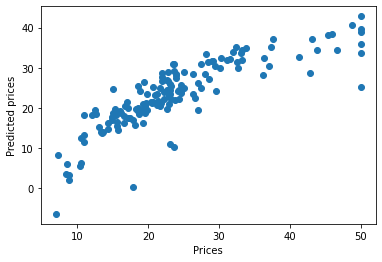

In [49]:
# plotting the y_test vs y_pred
# ideally should have been a straight line
plt.scatter(Y_test, y_test_predict)
plt.xlabel("Prices")
plt.ylabel("Predicted prices")
plt.show()

In [50]:
predicted_house_price = model.predict(X_test)
print("Predicted House Prices")
print(predicted_house_price)

Predicted House Prices
[31.4243217  31.96785487 30.93785448 22.34313349 18.83846235 16.20617519
 35.92908162 14.74157477 25.07700756 37.13230282 21.47652971 30.92661826
 28.07823424 34.02599249 33.7778476  40.63701192 24.25899783 23.43019291
 25.547906   21.34469147 32.65467539 17.80506124 25.46149722 25.0207691
 32.51742137 20.51357936 19.47165255 16.87107974 38.44316206  0.3888111
 32.39559257 32.15518102 26.05305015 23.82049084 20.56494632 19.66990981
  3.53212643 35.21058387 27.03280773 27.67994129 34.36642896 29.82003002
 18.31717228 31.55109654 17.93465111 28.4618882  19.39950216 21.60782793
 38.10391926 16.45101411 24.51003632 19.57072199 24.53359986 34.34589029
 26.74381857 34.86340026 21.02859444 19.77400901 18.68461884 24.64911818
 19.89923131 23.52871967 39.56690084 42.81848202 30.38116596 16.96889789
 23.83550068  3.18952008 31.52469303 28.66536677 18.40003941 27.1252398
 19.56625808 25.28579071 25.04642543 10.30562974 38.97693514  8.17901104
 18.51160158 30.32060192 22.858

In [51]:
predicted_dataframe = pd.DataFrame({"Predicted_Prices": predicted_house_price, "Actual_Prices": Y_test})
print(predicted_dataframe)

     Predicted_Prices  Actual_Prices
305         31.424322           28.4
193         31.967855           31.1
65          30.937854           23.5
349         22.343133           26.6
151         18.838462           19.6
..                ...            ...
56          25.786958           24.7
37          23.322335           21.0
66          26.366349           19.4
427         11.478172           10.9
12          20.449015           21.7

[152 rows x 2 columns]


## Please give the coefficient for the model

7)
Definition: The correlation coefficient is a measure that determines the degree to which two variables movements are associated. Anytime the correlation coefficient, denoted as r, is greater than zero, its a positive relationship. Conversely, anytime the value is less than zero, its a negative relationship. A value of zero indicates that there is no relationship between the two variables.

A positive correlation, when the correlation coefficient (r) is greater than 0, signifies that both variables move in the same direction or are correlated. When r is +1, it signifies that the two variables being compared have a perfect positive relationship; when one variable moves higher or lower, the other variable moves in the same direction with the same magnitude

A negative correlation occurs when the correlation coefficient (r) is less than 0 and indicates that both variables move in the opposite direction. When r is -1, the relationship is said to be perfectly negative correlated; in short, if one variable increases, the other variable decreases with the same magnitude, and vice versa. However, the degree to which two variable are negatively correlated might vary over time and are almost never exactly correlated, all the time.

R squared, mean squared error, and mean absolute error

8) 

In [53]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(Y_test, y_test_predict))
print('MSE:', metrics.mean_squared_error(Y_test, y_test_predict))
print('RSquared:', metrics.r2_score(Y_test, y_test_predict))
print('RMSE:', np.sqrt(metrics.mean_squared_error(Y_test, y_test_predict)))

MAE: 3.7071271372718084
MSE: 29.326596526123232
RSquared: 0.6996255772983115
RMSE: 5.4154036346447185


RSquared - R-squared (R2) is a statistical measure that represents the proportion of the variance for a dependent variable that's explained by an independent variable or variables in a regression model.

RMSE - The root-mean-square deviation (RMSD) or root-mean-square error (RMSE) (or sometimes root-mean-squared error) is a frequently used measure of the differences between values (sample or population values) predicted by a model or an estimator and the values observed.

MAE - mean absolute error (MAE) is a measure of difference between two continuous variables.

MSE - the mean squared error (MSE) or mean squared deviation (MSD) of an estimator measures the average of the squares of the errors—that is, the average squared difference between the estimated values and what is estimated.

Here the value of MAE is 3.70, MSE is 29.32, R squared is 0.699 and RMSE is 5.415

## Improvement in the model

In [54]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.20, random_state=5)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(404, 13)
(102, 13)
(404,)
(102,)


In [55]:
coeff_df = pd.DataFrame(model.coef_,X.columns,columns=['Coefficient'])
coeff_df

,Coefficient
CRIM,-0.153776
ZN,0.065016
INDUS,-0.024260
CHAS,1.622033
NOX,-15.299931
RM,3.351967
AGE,0.011326
DIS,-1.548109
RAD,0.302642
TAX,-0.012232


In [56]:
lin_model = LinearRegression()
lin_model.fit(X_train, Y_train)

LinearRegression()

In [57]:
y_test_predict = model.predict(X_test)

In [58]:
# model evaluation for training set

y_train_predict = lin_model.predict(X_train)
# root mean square error of the model
rmse = (np.sqrt(mean_squared_error(Y_train, y_train_predict)))
# r-squared score of the model
r2 = r2_score(Y_train, y_train_predict)

print("The model performance for training set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))
print("\n")

# model evaluation for testing set

y_test_predict = lin_model.predict(X_test)
# root mean square error of the model
rmse = (np.sqrt(mean_squared_error(Y_test, y_test_predict)))

# r-squared score of the model
r2 = r2_score(Y_test, y_test_predict)

print("The model performance for testing set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))

The model performance for training set
--------------------------------------
RMSE is 4.741000992236516
R2 score is 0.738339392059052


The model performance for testing set
--------------------------------------
RMSE is 4.56829204230318
R2 score is 0.7334492147453109


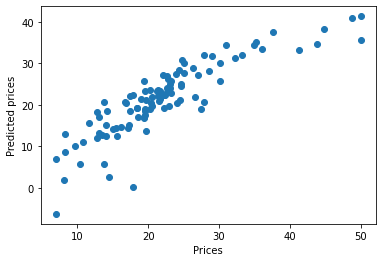

In [59]:
# plotting the y_test vs y_pred
# ideally should be a straight line
plt.scatter(Y_test, y_test_predict)
plt.xlabel("Prices")
plt.ylabel("Predicted prices")
plt.show()

In [60]:
predicted_house_price = model.predict(X_test)
print("Predicted House Prices")
print(predicted_house_price)

Predicted House Prices
[37.13230282 32.81098891 27.28024838  6.55595796 34.03298716  5.52373677
 28.22575374 30.35932007 26.57865025 22.31904753 31.89978763 21.57022537
 23.97043996 33.39444419 28.76355546 14.48650955  0.3888111  18.83846235
 14.64835342 12.29969767  3.73642849 20.53795757 37.72417041 24.33753588
 31.81937414 11.17357006 24.94649589 23.52871967 22.16821072 20.82542157
 16.18386405  8.3664959  18.15070869 22.20792393 28.41864261 19.89923131
 28.92895886  8.39982976 40.63701192 34.87660665 20.50653518  4.69598355
 29.82003002 11.71266067 26.26715448 30.94275411 -6.40058282 20.45392306
 21.10634541 13.90429035 21.47652971 19.25422389 23.40364719 13.82483416
 17.29540041 25.78695839 34.34589029 14.75154927 27.1252398  21.09721048
 21.04616148 25.547906   15.90084845 32.65467539 21.70393295 12.8619222
 20.10385073 23.82049084 21.02992216 21.171008   20.56494632 27.03280773
 17.08921174 18.55233875 20.24161028 25.9161984  21.91351966 15.02055201
 34.53414612 18.36321048 22.9

In [61]:
predicted_dataframe = pd.DataFrame(
    {"Predicted_Prices": predicted_house_price, "Actual_Prices": Y_test})
print("Predicted and Actual Price Data frame")
print(predicted_dataframe)

Predicted and Actual Price Data frame
     Predicted_Prices  Actual_Prices
226         37.132303           37.6
292         32.810989           27.9
90          27.280248           22.6
373          6.555958           13.8
273         34.032987           35.2
..                ...            ...
349         22.343133           26.6
212         21.570957           22.4
156         13.123351           13.1
480         23.137514           23.0
248         21.163722           24.5

[102 rows x 2 columns]


In [62]:
print('MAE:', metrics.mean_absolute_error(Y_test, y_test_predict))
print('MSE:', metrics.mean_squared_error(Y_test, y_test_predict))
print('RSquared:', metrics.r2_score(Y_test, y_test_predict))
print('RMSE:', np.sqrt(metrics.mean_squared_error(Y_test, y_test_predict)))

MAE: 3.213270495842369
MSE: 20.869292183770558
RSquared: 0.7334492147453109
RMSE: 4.56829204230318


Comparisson: In the previous model the value of MAE was 3.70 and now it has improved to 3.21, MSE was 29.32 and it has improved to 20.86, R squared was 0.699 but now it has improved to 0.73 and RMSE was 5.415 and now it has improved to 4.568

In [63]:
model.coef_

array([-1.53776087e-01,  6.50159270e-02, -2.42597326e-02,  1.62203309e+00,
       -1.52999306e+01,  3.35196668e+00,  1.13259963e-02, -1.54810871e+00,
        3.02641886e-01, -1.22317535e-02, -8.11539044e-01,  1.29504798e-02,
       -5.44861583e-01])

In [64]:
corr = boston.corr()
corr

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536
